In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("mushroom.csv")

In [3]:
data

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,863,sunken,scaly,brown,yes,foul,attached,crowded,narrow,chocolate,...,partial,orange,one,flaring,purple,abundant,leaves,poisonous,5.877891,17.464145
1996,1160,sunken,scaly,purple,yes,musty,attached,distant,narrow,red,...,partial,white,one,zone,yellow,numerous,waste,poisonous,6.500840,13.501957
1997,265,convex,grooves,green,yes,fishy,notched,close,narrow,pink,...,partial,brown,two,evanescent,yellow,abundant,woods,poisonous,13.558064,11.270020
1998,411,bell,smooth,white,no,pungent,free,close,narrow,orange,...,universal,yellow,one,cobwebby,brown,solitary,woods,poisonous,11.092703,8.423199


In [4]:
data.isnull().sum()

Unnamed: 0                  0
cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
class                       0
stalk_height                0
cap_diameter                0
dtype: int64

<Axes: >

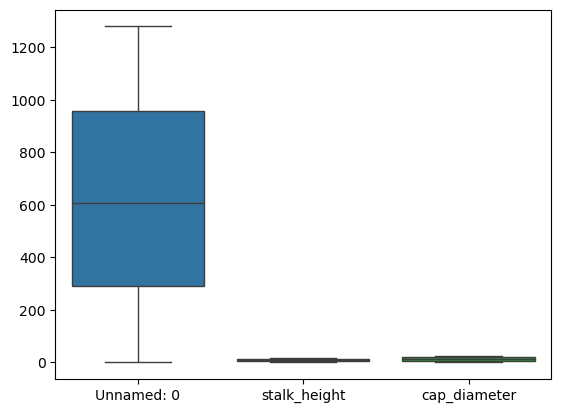

In [5]:
sns.boxplot(data)

In [6]:
categorical_columns = data.select_dtypes(include=['object']).columns


In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
label_encoders = {}

for col in categorical_columns:
    le=LabelEncoder()
    data[col]=le.fit_transform(data[col])
    label_encoders[col]=le

In [9]:
print(data.head())

   Unnamed: 0  cap_shape  cap_surface  cap_color  bruises  odor  \
0        1167          4            2          7        0     1   
1        1037          4            0          6        0     1   
2         309          3            1          5        1     4   
3         282          0            2          4        1     3   
4         820          3            3          8        1     5   

   gill_attachment  gill_spacing  gill_size  gill_color  ...  veil_type  \
0                1             2          0           7  ...          0   
1                3             1          1           3  ...          1   
2                1             1          0           8  ...          1   
3                3             0          0           6  ...          0   
4                2             1          1           6  ...          1   

   veil_color  ring_number  ring_type  spore_print_color  population  habitat  \
0           0            2          6                  3         

<Axes: xlabel='stalk_height', ylabel='cap_diameter'>

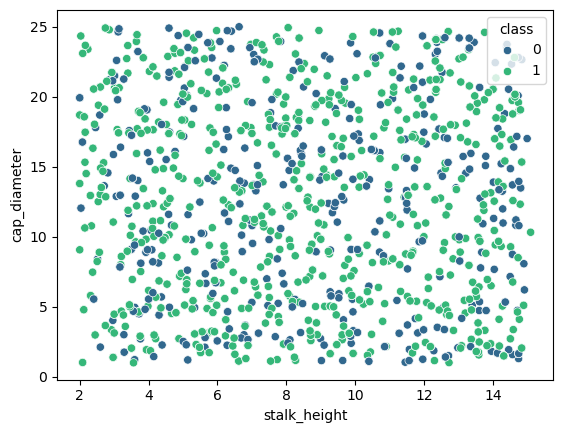

In [10]:
sns.scatterplot(x=data['stalk_height'],y=data['cap_diameter'],hue=data['class'],palette='viridis')

In [11]:
# model Building

In [12]:
x=data.drop(columns=["class"],axis=1)
y=data["class"]

In [13]:
y

0       1
1       0
2       1
3       1
4       1
       ..
1995    1
1996    1
1997    1
1998    1
1999    1
Name: class, Length: 2000, dtype: int32

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC


In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)
svc=SVC()

svc.fit(x_train,y_train)
ypred=svc.predict(x_test)
print(svc.score(x_train,y_train))
print(svc.score(x_test,y_test))

0.7025
0.69


In [16]:
# accuracy is getting very bad because the reason is not performing feature 
#scalling before model

In [17]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [18]:
x

array([[ 1.44540978,  1.35664266,  0.39842442, ...,  0.97916574,
         1.57645935, -1.03012304],
       [ 1.09874141,  1.35664266, -1.39628018, ...,  0.97916574,
        -1.21646308,  0.95840718],
       [-0.84260148,  0.66003539, -0.49892788, ...,  0.97916574,
         0.16371736, -0.72490441],
       ...,
       [-0.95993539, -0.03657188, -0.49892788, ...,  1.4865055 ,
         1.38218107, -0.14819255],
       [-0.57060014, -1.42978643,  1.29577672, ...,  1.4865055 ,
         0.71519905, -0.55216407],
       [ 1.19474188, -0.03657188,  0.39842442, ...,  0.47182598,
         1.24916951,  1.24055562]])

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)
svc=SVC(kernel='poly')

svc.fit(x_train,y_train)
ypred=svc.predict(x_test)
print(svc.score(x_train,y_train))
print(svc.score(x_test,y_test))

0.944375
0.8425


In [20]:
from sklearn.model_selection import GridSearchCV

In [21]:
param = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}


grid = GridSearchCV(estimator=SVC(), param_grid=param, verbose=1, cv=5)
grid.fit(x_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Cross-Validation Score:", grid.best_score_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'poly'}
Best Cross-Validation Score: 0.8412499999999999


In [22]:
grid.best_params_

{'C': 10, 'gamma': 'scale', 'kernel': 'poly'}

In [23]:
svc = SVC(kernel='poly')

svc.fit(x_train,y_train)
ypred = svc.predict(x_test)
print(svc.score(x_train,y_train))
print(svc.score(x_test,y_test))

0.944375
0.8425


In [24]:
from sklearn.metrics import classification_report


In [25]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.91      0.55      0.68       124
           1       0.83      0.97      0.90       276

    accuracy                           0.84       400
   macro avg       0.87      0.76      0.79       400
weighted avg       0.85      0.84      0.83       400



In [26]:
# and the final accuracy is 84